In [26]:
pip install pandas numpy scipy scikit-learn matplotlib

In [1]:
# Import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [2]:
# Memuat dataset
data = pd.read_csv("CarPrice_Assignment.csv")

#Output informasi mengenai DataFrame.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [32]:
# Impor Kumpulan Data
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,cluster
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


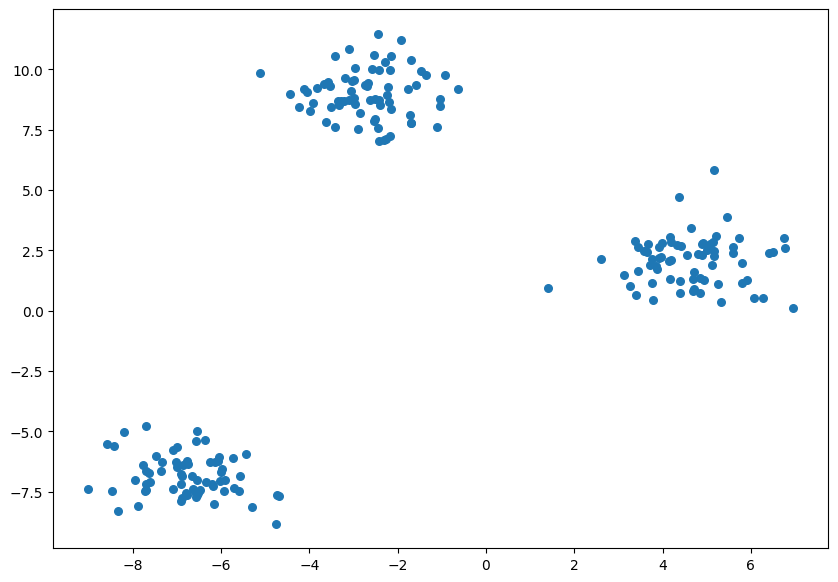

In [35]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Hasilkan data sintetis
X, y = make_blobs(n_samples=205, centers=3, random_state=42)

# Visualisasikan data sintetis
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.show()

In [3]:
# Pilih fitur yang akan digunakan
selected_features = ['horsepower', 'price']
X = data[selected_features]

In [4]:
# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Metode Hierarchical Clustering
linkage_matrix = linkage(X_scaled, method='ward')

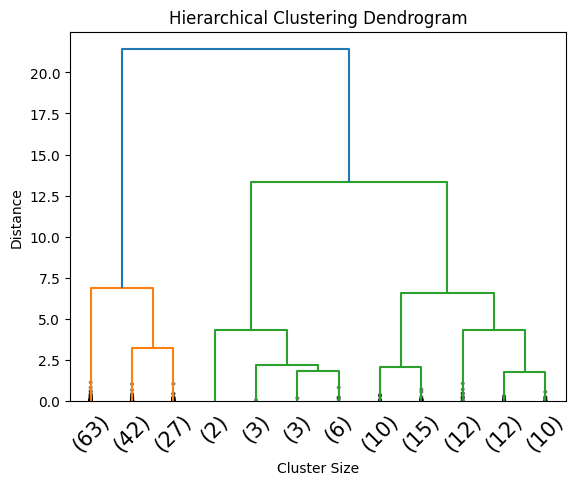

In [6]:
# Buat dendrogram
dendrogram(linkage_matrix, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [7]:
# Menentukan jumlah cluster berdasarkan dendrogram
# (Bisa juga menggunakan metode lain untuk menentukan jumlah cluster)
num_clusters = 3

In [11]:
# Melakukan clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=num_clusters, affinity='euclidean', linkage='ward')
data['cluster'] = hc.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [31]:
# Menampilkan hasil clustering
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \

In [47]:
# Hasilkan data sintetis
X, y = make_blobs(n_samples=205, centers=3, random_state=42)

In [48]:
# Melakukan hierarchical clustering
linkage_matrix = linkage(X, method='ward')

In [50]:
# Cut dendrogram untuk mendapatkan cluster
from scipy.cluster.hierarchy import fcluster
max_d = 25
clusters = fcluster(linkage_matrix, max_d, criterion='distance')


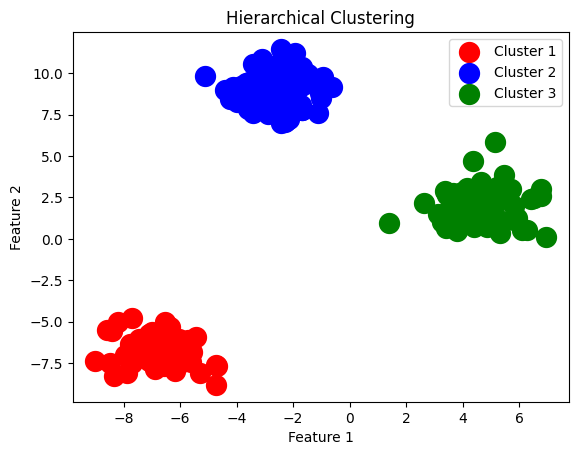

In [51]:
# Visualisasi clustering
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s=205, c='red', label='Cluster 1')
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s=205, c='blue', label='Cluster 2')
plt.scatter(X[clusters == 3, 0], X[clusters == 3, 1], s=205, c='green', label='Cluster 3')

# Add labels, legend, etc.
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()